#Aula 03

Olá Cientista! 

Seja bem vindo e bem vinda à aula 03!

Na aula anterior, pudemos entender a importância da construção de gráficos na visualização dos dados. 
Discutimos principalmente os histogramas e boxplots e, além disso, também falamos sobre a função ```describe``` do Pandas. 

Você conseguiu fazer todos os desafios? Então vamos mergulhar juntos na aula 03!

Hoje, nosso foco é nos aprofundar ainda mais na base de dados e entender mais sobre a relação entre as nossas variáveis.

Olhando para o nosso conjunto de dados, percebemos que temos dados de tratamento, tempo, dosagem, composto químico usado e os dados genéticos.
E os primeiros dados que vamos relacionar são aqueles ligados ao tratamento e, como já vimos anteriormente, estes são dados categóricos.

Um dos vieses de análise está relacionado às proporções destas categorias e, como aprendemos na aula anterior, um gráfico de frequências pode ser muito útil nesse aspecto.

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')

## Retirando os Hífens das Colunas

In [2]:
i = 0
for i in range(len(dados.columns)):
  dados.rename(columns = {dados.columns[i] : dados.columns[i].replace('-', '')}, inplace=True)

In [3]:
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## Visualização da Frequência (crosstab, groupby)

Conforme nossa busca na [documentação do Pandas](https://pandas.pydata.org), encontramos uma maneira para construir uma tabela de frequências, a função ```crosstab```. Esta função recebe como argumentos os dados que gostaríamos de correlacionar de uma maneira bem simples: ```crosstab(dataframe['coluna1'], dataframe['coluna2'])``` e então, como retorno, temos uma matriz que relaciona essas variáveis a partir da frequência.

Podemos ver que as categorias da variável ```dose``` transformaram-se em linhas e as categorias da variável ```tempo``` são colunas.

In [4]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [5]:
dados.groupby(by=['dose', 'tempo']).count()[['tratamento']]

tratamento
dose tempo            
D1   24           3886
     48           4354
     72           3907
D2   24           3886
     48           3896
     72           3885

Entretanto, na matriz acima não estamos considerando o tratamento usado, apesar desta variável ser de suma importância, visto que, decide se há ou não presença de um composto no evento.
Por isso, vamos construir uma nova tabela com o ```crosstab``` considerando essa nova variável.

Para isso, usaremos a mesma sintaxe anterior, adicionando ```dados['tratamento']```ao final e, adicionalmente, deixamos as duas primeiras colunas declaradas entre colchetes, pois assim garantimos que suas informações estarão distribuídas nas linhas, ou seja, o código final para este comando será: ```crosstab(dataframe[['coluna1'], dataframe['coluna2']], dataframe['coluna3'])```.

O resultado será uma tabela de frequências multi-index (mais de um índice) sendo que o index da esquerda se refere aos dados da variável ```dose``` e o index da direita são as informações de ```tempo```, respeitando a ordem na qual declaramos as respectivas variáveis.

In [6]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [7]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).count()[['droga']]

droga
dose tempo tratamento         
D1   24    com_controle    301
           com_droga      3585
     48    com_controle    343
           com_droga      4011
     72    com_controle    307
           com_droga      3600
D2   24    com_controle    305
           com_droga      3581
     48    com_controle    305
           com_droga      3591
     72    com_controle    305
           com_droga      3580

Apesar de já termos construído uma tabela bem interessante através da frequência de algumas variáveis, podemos explorar a proporção destes dados entre si. 

Para fazer isso vamos, novamente, copiar o nosso comando acrescentando um novo parâmetro ao final, o ```normalize```. Então o código ficará: ```crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')```. Esse parâmetro normaliza a nossa tabela e escolhemos que ela faça isso a partir do índice, ou seja, ela fará a comparação entre as categorias, isto é, a soma de cada linha será igual a 1.
Fazer este tipo de análise possibilita que façamos algumas suposições acerca do balanceamento entre as categorias e, analisando a nossa matriz, podemos concluir que há proporcionalidade na nossa base de dados.


In [41]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index') # normalize='columns'

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Podemos também agregar à nossa matriz uma métrica estatística associada a uma coluna. 
Para que isso seja cumprido, adicionamos mais dois parâmetros à nossa função ```crosstab```: o primeiro é o ```values = dataframe['variavel']``` e o segundo é o ```aggfunc``` que recebe como parâmetro alguma métrica estatística, como a média. Logo, ```aggfunc = 'mean'```. Isso quer dizer que queremos comparar entre as diferentes categorias (```com_controle``` e ```com_droga```) a média de valores associados a variável ```g-0```.

Aqui, podemos perceber algumas diferenças entre essas médias e podemos traçar algumas hipóteses a serem verificadas. Lembrando que a média de uma variável, é uma conta feita a partir dos valores que aquela amostra apresenta e não é o valor que ela assume, de fato. Por isso, não podemos concluir nada somente olhando a média, mas entender seu comportamento nos dá indícios por quais caminhos podemos seguir.

In [9]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Para variáveis contínuas, fazer tabelas de frequências não é a melhor estratégia para analisá-las. 
Mas, construir um novo tipo de gráfico pode ser muito interessante para o nosso processo. 

Então, para fins de visualização, o primeiro passo é filtrar a nossa base de dados com as colunas que queremos investigar.
No nosso caso, vamos analisar a relação entre as colunas ```g-0``` e ```g-3``` e, por isso, definimos uma lista de arrays com os nomes dessas colunas (```dataframe[['coluna1', 'coluna2']]```) e, como retorno, teremos nosso conjunto somente com as variáveis alvo.

In [10]:
dados[['g0', 'g3']]

,g0,g3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


O ```scatterplot``` é um tipo de gráfico pré programado da biblioteca Seaborn e recebe como parâmetros a variável que vai ser usada no eixo x, a variável do eixo y e, por fim, o conjunto de dados. 

O código ficará: 

```sns.scatterplot(x = 'variavel para o eixo x', y = 'variavel para o eixo y', data = base de dados)```

E, como queremos investigar as variáveis ```g-0``` e ```g-3```, atribuímos cada uma delas a um eixo. 

O gráfico de dispersão utiliza os dados como uma coleção de pontos cartesianos e ele é usado para apurar se há relação de causa e efeito entre duas variáveis quantitativas. 

No nosso caso, cada linha será um par ordenado de acordo com o que declaramos no código, ou seja, o valor de ```g-0``` será a cordenada x e o valor de ```g-3``` será a coordenada y. 

Por exemplo: para a linha 0 da base de dados teremos (1,0620 , -0,6208) 

Mas, por outro lado, a partir do gráfico de dispersão, não podemos dizer que uma variável afeta a outra, podemos apenas definir se há relação entre elas e qual a intensidade disso.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
### Setando o tamanho das figuras do Seaborn ###
sns.set(rc={'figure.figsize' : (10, 8)})

Text(0, 0.5, 'gene 3')

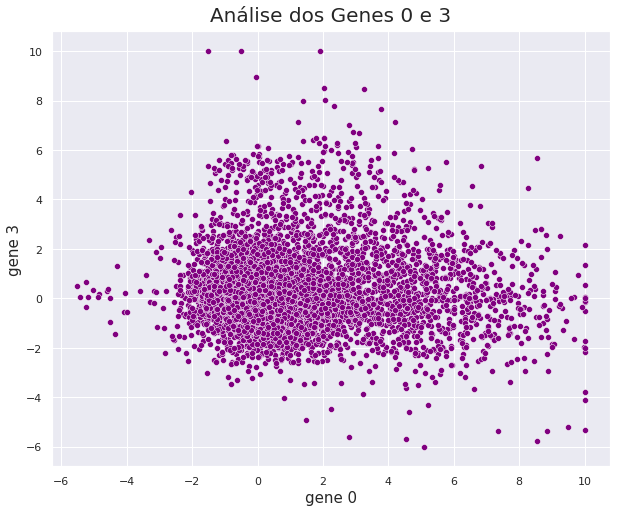

In [13]:
ax = sns.scatterplot(x='g0', y = 'g3', data=dados, color='purple')
ax.set_title('Análise dos Genes 0 e 3', fontsize=20, pad=10)
ax.set_xlabel('gene 0', fontsize=15)
ax.set_ylabel('gene 3', fontsize=15)

Observando o gráfico que construímos acima, não parecemos encontrar nenhum padrão tão definido. Então, vamos confrontar mais duas colunas para verificar se encontramos algum padrão melhor definido.

Aqui, vamos usar a variável ```g-0``` para o eixo x e a variável ```g-8``` para o eixo y para construir o nosso novo gráfico.

Como retorno, recebemos um gráfico de dispersão onde a nuvem de pontos cartesianos parece desenhar melhor um padrão: conforme o ```g-0``` aumenta, o valor de ```g-8``` diminui. Aparentemente, a relação entre essas duas variáveis desenha uma curva com inclinação negativa.

Text(0, 0.5, 'gene 8')

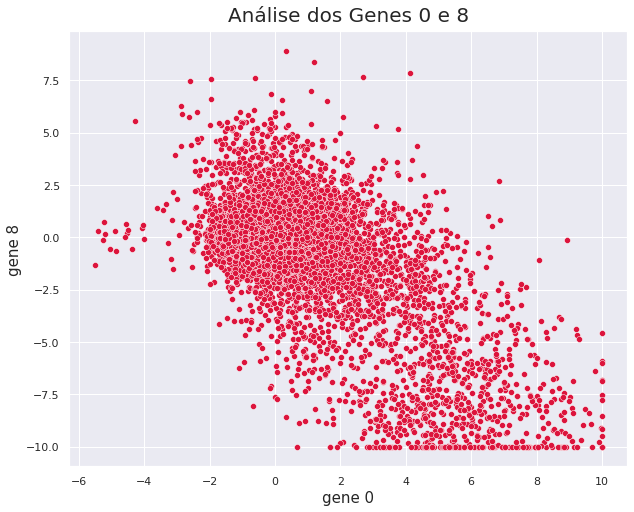

In [14]:
ax = sns.scatterplot(x='g0', y = 'g8', data=dados, color='crimson')
ax.set_title('Análise dos Genes 0 e 8', fontsize=20, pad=10)
ax.set_xlabel('gene 0', fontsize=15)
ax.set_ylabel('gene 8', fontsize=15)

E, como parte do nosso trabalho é levantar hipóteses e confirmá-las (ou não), precisamos verificar se a nossa suspeita de que a relação entre as variáveis ```g-0``` e ```g-8```desenha uma curva com inclinação negativa. 

Para isso, vamos utilizar uma outra função do Seaborn, a ```lmplot```. A ```lmplot``` vai desenhar no nosso gráfico de dispersão uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Os parâmetros a serem recebidos, são muito parecidos com aqueles usados no ```scatterplot```. Então teremos 

```sns.lmplot(data=base de dados, x='variavel para o eixo x', y='variavel para o eixo y', line_kws={'color': 'cor da linha de tendencia'})```

Utilizamos o parâmetro ```line_kws = {'color': 'red'}``` para criar um bom contraste entre os pontos do gráfico de dispersão e a linha de tendência.

Observando o nosso gráfico, podemos concluir a nossa hipótese inicial, mas ele ainda não é suficiente para finalizarmos a nossa análise.



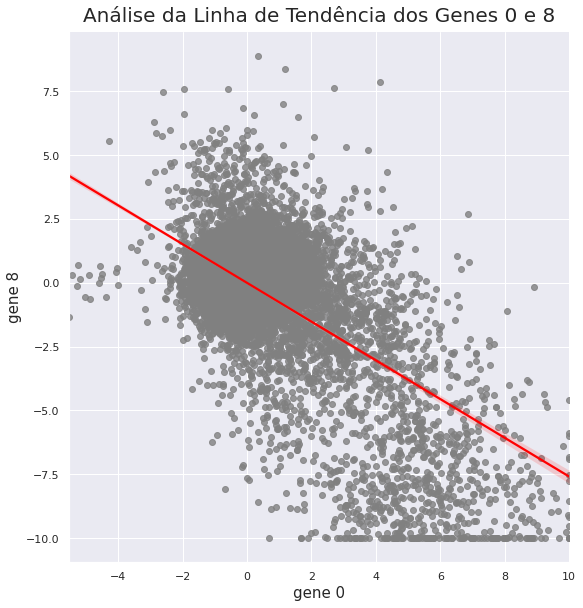

In [15]:
ax = sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'red'}, scatter_kws={'color': 'gray'}, height=8)
plt.title('Análise da Linha de Tendência dos Genes 0 e 8', fontsize=20, pad=10)
plt.xlabel('gene 0', fontsize=15)
plt.ylabel('gene 8', fontsize=15)
ax

Para uma análise mais real e completa, é interessante que separemos ainda mais o nosso conjunto de dados. Isso porque, na imagem acima, apesar de termos uma linha de tendência para a relação entre os dados ```g-0``` e ```g-8```, não há filtros para a dosagem, o tratamento e o tempo. E, pesando em drug discorevy, é extremamente importante que façamos a separação desses conjuntos.

Então, vamos acrescentar mais alguns parâmetros para executar a separação. Acrescentamos o parâmetro ```col = tramento``` para que sejam plotados gráficos de acordo com as categorias da variável em questão nas colunas (```com_droga``` e ```com_controle```) e também incluímos o parâmetro ```row = 'tempo'``` para que mais uma subdivisão seja feita e, as linhas apresentem novos gráficos com as diferentes categorias (```24```,```48``` e ```72```).

Assim, podemos perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

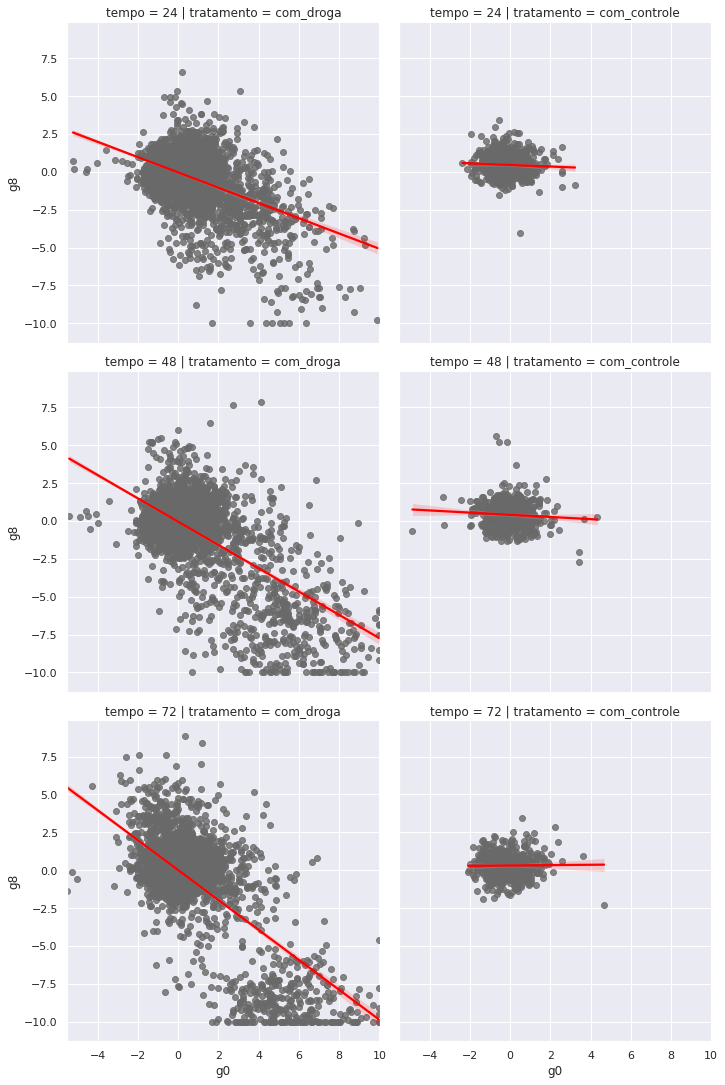

In [16]:
sns.lmplot(data=dados, x='g0', y='g8', line_kws={'color': 'red'}, scatter_kws={'color': 'dimgray'}, col='tratamento', row='tempo')

# Correlação

Outra medida para analisar como as variáveis estão associadas é a correlação. 

Para isso, vamos usar uma função já conhecida do Pandas, o ```loc``` e, vamos agregar o ```.corr```. O ```loc``` serve para definirmos o intervalo em que a correlação vai ser calculada. Aqui, estamos calculando a correlação entre todos os genes. 

Como retorno, temos uma tabela bem grande que correlaciona a variável e apresenta valores entre 1 e -1.
Por exemplo, o primeiro valor numérico apresentado na primeira linha é o resultado da correlação entre a variável que está nesta linha e nesta coluna, no nosso caso, o ```g-0``` em ambas as extremidades. No primeiro valor numérico apresentado na segunda linha, temos a correlação entre ```g-1``` e ```g-0``` e assim por diante. 

Mas, como interpretar esses valores? Bom, temos a seguinte divisão:
    
    - Valores muito próximos de 1 ou -1: variáveis altamente correlacionadas
    - Valores muito próximos de 0: variáveis pouco ou não correlacionadas

E, o que diferencia se essa correlação será proporcional ou inversamente proporcional, será o sinal. Quer dizer:

    - Valores muito próximos de 1: variáveis proporcionalmente correlacionadas
    - Valores muito próximos de -1: variáveis correlacionadas inversamente proporcionais

Agora que já sabemos como analisar essa tabela, podemos voltar para o nosso gráfico de dispersão construído com ```g-0``` e ```g-8`` e perceber que a nossa tabela confirma que ambas as variáveis estão correlacionadas e são inversamente proporcionais, visto que o valor apresentado na tabela é de -0,604212.

Analisar essa grande tabela é um desafio bem grande. Então, como auxílio visual costumamos plotar um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

E, como esse código já está construído na própria documentação do Seaborn, vamos copiar o [código](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) de lá, fazendo apenas algumas pequenas alterações.

Então, de ```corr = d.corr()``` mudamos para ```corr = dados.loc[:,'g-0':'g-50'].corr()``` pois ajustamos o ```d``` para a nossa base de dados (```dados```) e decidimos incluir um ```loc``` para fazer o mapa de calor apenas do ```g-0``` ao ```g-50```. 
Também retiramos o parâmetro ```vmax=.3``` da última parte do código pois este era um limitador da correlação que não nos interessa no momento.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (```import numpy as np```).





In [17]:
corr = dados.loc[:,'g0':'g50'].corr()
corr

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212,0.058257,-0.106304,0.137596,0.171353,0.136856,-0.133521,0.025275,-0.070144,0.058305,-0.108843,-0.034259,0.142193,-0.189048,-0.097622,0.208673,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408,-0.194962,-0.051850,-0.032510,0.091318,-0.113642,0.179365,0.065968,-0.059884,-0.114453,0.102340,0.106371,-0.038967,0.045983,0.073990,-0.040374,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891,0.262002,-0.126174,0.287440,0.222967,0.419395,-0.453566,0.492635,-0.036159,0.014755,-0.199236,0.313535,0.584749,-0.579429,-0.39801

O mapa de calor mostra uma escala de cores em sua lateral direita, a legenda e, para cada pontinho, podemos perceber a força da correlação sendo mostrada através de uma cor associada.

Olhando para o nosso gráfico, percebemos que, em sua maioria, as expressões genicas não apresentam correlações tão altas entre si (podemos deduzir isso observando que o gráfico em grande parte é translúcido).

É importante destacar que não podemos inferir causalidade a partir da correlação, como já descrevemos anteriormente no gráfico de dispersão. 
Exemplificando: vimos que ```g-0``` e ```g-8``` têm correlação inversamente proporcional entre si mas não podemos concluir que é o ```g-0``` que faz o ```g-8``` diminuir, ou seja, a causa.



In [18]:
import numpy as np

In [42]:
np.ones_like(corr)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [43]:
np.triu(np.ones_like(corr, dtype=bool), k=1)

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

Text(0.5, 1.0, 'Correlação dos Genes 0 a 50')

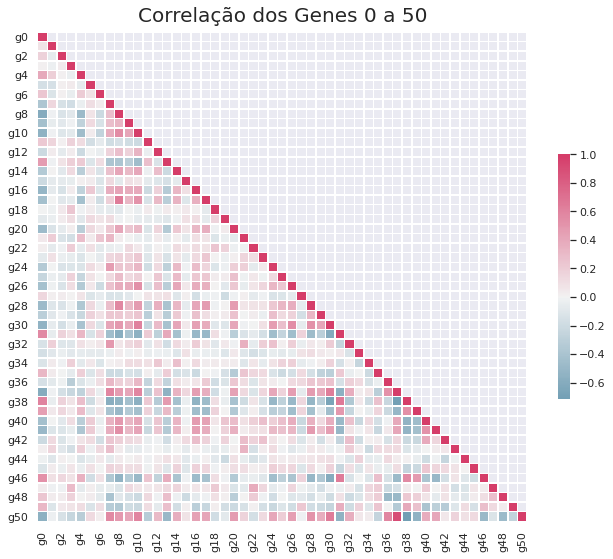

In [38]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação dos Genes 0 a 50', fontsize=20, pad=10)

Agora, vamos repetir o processo de construção do mapa de calor para a a viabilidade celular (```c```).

Definimos uma nova variável ```corr_celular``` e ajustamos os parâmetros de acordo com os nossos ```cs```.

Observando o gráfico de saída, podemos perceber uma grande diferença entre os dois mapas de calor que construímos. A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

In [22]:
corr_celular = dados.loc[:,'c0':'c50'].corr()

Text(0.5, 1.0, 'Correlação dos Tipos Celulares 0 a 50')

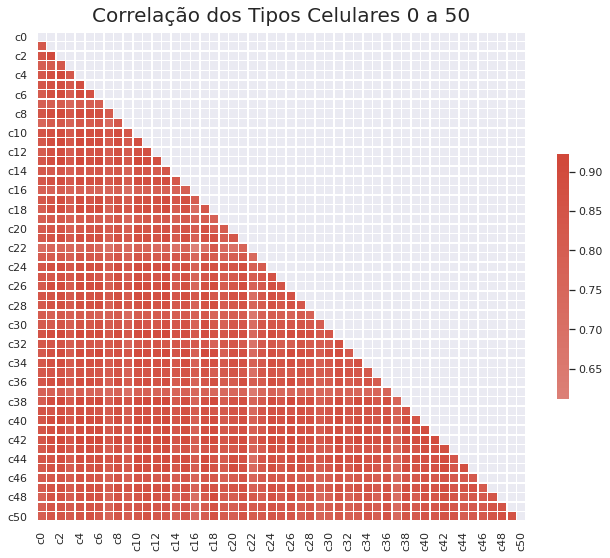

In [37]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlação dos Tipos Celulares 0 a 50', fontsize=20, pad=10)

## Correlação entre os Genes e os Tipos Celulares

**Sabendo que a tabela possui 877 colunas, 100 colunas de tipos celulares e 5 outras colunas**

**Para descobrir a quatidade de colunas de gene: 877 - 105 = 772**

In [61]:
gene_25 = dados.loc[:,'g0':'g24']
celulares_25 = dados.loc[:,'c0':'c24']

### Concatenando os DataFrames

In [64]:
df_gc = pd.concat([gene_25, celulares_25], axis=1)
df_gc.head()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,-0.0600,0.1083,0.6864,0.4043,0.4213,-0.6797,0.2888,0.4323,-0.3381,0.3407,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,0.0927,0.2723,0.2772,0.7776,0.3679,0.5696,0.2835,1.4080,0.3745,0.6775,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,-0.1312,-1.4640,0.3394,-1.7790,0.2188,0.5826,-0.7513,0.0543,0.7182,-0.4159,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.3998,-4.5520,-2.7350,-1.9630,-2.8610,-1.2670,-2.5830,-0.5036,-3.1590,-1.8510,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,-0.3774,0.7364,-0.1659,0.2341,1.0060,0.3204,-0.0852,-0.2284,-0.2533,-0.3174,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624


In [66]:
corr_gc = df_gc.corr()

Text(0.5, 1.0, 'Correlação dos Genes com os Tipos Celulares')

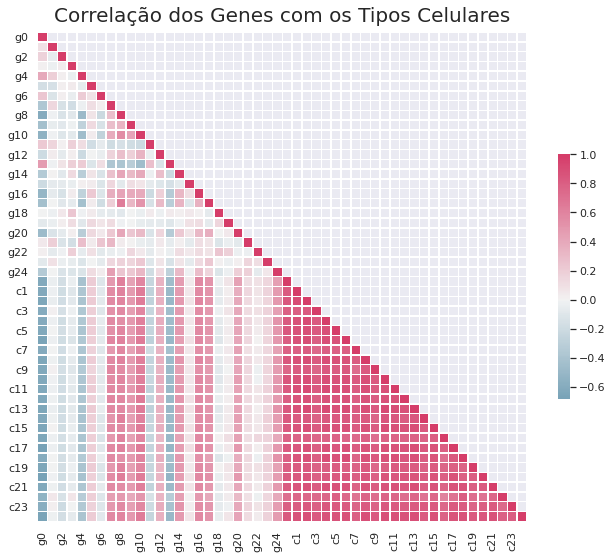

In [68]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_gc, dtype=bool), k=1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 0, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr_gc, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title('Correlação dos Genes com os Tipos Celulares', fontsize=20, pad=10)

#Desafios

##Aula 03

###Desafio 01: Criar tabelas de frequência com pandas.groupby()

###Desafio 02: Normalizar o crosstab pela coluna.

###Desafio 03: Explorar outros agregadores.

###Desafio 04: Explorar o melt.

###Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 

###Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

###Desafio 07: Resumo do que você aprendeu com os dados